In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,NaN,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,NaN,0.88269,0.35406,1.62780,3.29400,NaN,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,NaN,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,NaN,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,NaN,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	12
float64		column 2	6
float64		column 3	13
float64		column 4	25
float64		column 5	30
float64		column 6	24
float64		column 7	6
float64		column 8	18
float64		column 9	24
float64		column 10	25
float64		column 11	6
float64		column 12	30


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,388.000000,394.000000,387.000000,375.000000,370.000000,376.000000,394.000000,382.000000,376.000000,375.000000,394.000000,370.000000
mean,-0.085251,0.046716,2.032102,1.874084,1.962886,1.979827,2.026854,1.978268,1.955462,2.028901,1.964140,1.946299
std,2.539181,2.742374,1.120674,1.134835,1.133015,1.127991,1.150968,1.121707,1.125328,1.133739,1.148615,1.162803
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.044882,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.694850,-0.822895,1.127450,0.941105,0.978445,1.045725,1.025025,1.046450,1.069850,1.060000,0.919010,0.946235
50%,-0.063594,0.009048,2.089000,1.758500,1.954450,2.026750,2.098100,1.954800,2.067200,2.087700,1.904550,1.931250
75%,0.774360,0.884558,2.961050,2.774250,2.951250,2.955775,2.965050,2.946200,2.902550,3.035000,2.959800,2.940025
max,8.409300,6.777100,3.951500,3.993400,3.971200,3.992300,3.996300,3.994400,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

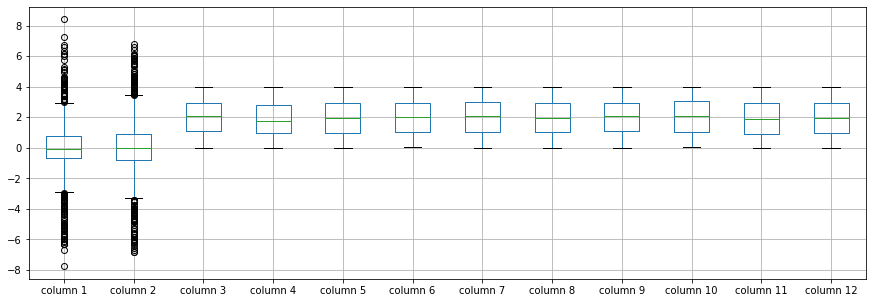

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.085251
column 2     0.046716
column 3     2.032102
column 4     1.874084
column 5     1.962886
column 6     1.979827
column 7     2.026854
column 8     1.978268
column 9     1.955462
column 10    2.028901
column 11    1.964140
column 12    1.946299
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.000676,-0.051658,-0.071368,0.007751,-0.004256,-0.038955,0.027254,-0.021106,0.022888,0.080485,-0.000543
column 2,-0.000676,1.000000,-0.028453,0.032524,-0.055412,-0.074785,-0.004024,-0.035263,-0.034605,0.039542,-0.020715,0.060400
column 3,-0.051658,-0.028453,1.000000,-0.007926,-0.056051,-0.047784,-0.080189,0.074570,0.123855,-0.056890,-0.070155,0.011961
column 4,-0.071368,0.032524,-0.007926,1.000000,0.009434,0.095637,-0.008189,0.035182,-0.005576,0.053952,0.011146,-0.063151
column 5,0.007751,-0.055412,-0.056051,0.009434,1.000000,0.043836,0.039239,-0.002037,0.010616,-0.002602,0.005335,-0.029425
column 6,-0.004256,-0.074785,-0.047784,0.095637,0.043836,1.000000,0.020091,0.052452,0.022226,-0.004888,0.034802,0.009886
column 7,-0.038955,-0.004024,-0.080189,-0.008189,0.039239,0.020091,1.000000,-0.044745,0.059401,0.028345,0.017748,-0.084946
column 8,0.027254,-0.035263,0.074570,0.035182,-0.002037,0.052452,-0.044745,1.000000,0.059206,-0.125927,-0.030870,-0.017412
column 9,-0.021106,-0.034605,0.123855,-0.005576,0.010616,0.022226,0.059401,0.059206,1.000000,0.022695,0.009514,0.045524
column 10,0.022888,0.039542,-0.056890,0.053952,-0.002602,-0.004888,0.028345,-0.125927,0.022695,1.000000,-0.017149,0.021079


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+29,12+29+29,12+29+29+29,12+29+29+29+29,12+29+29+29+29+29,12+29+29+29+29+29+29,12+29+29+29+29+29+29+29,12+29+29+29+29+29+29,12+29+29+29+29+29,12+29+29+29+29,12+29+29+29,12+29+29,12+29,12], vae_layer = False, seed = 29)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.42733741760254
Epoch: 1 , loss: 26.470730895996095
Epoch: 2 , loss: 26.40281021118164
Epoch: 3 , loss: 26.33636032104492
Epoch: 4 , loss: 26.069345779418946
Epoch: 5 , loss: 24.943776092529298
Epoch: 6 , loss: 22.513587875366213
Epoch: 7 , loss: 21.97548194885254
Epoch: 8 , loss: 21.251910552978515
Epoch: 9 , loss: 20.851909637451172
Epoch: 10 , loss: 20.562791366577148
Epoch: 11 , loss: 20.53256591796875
Epoch: 12 , loss: 20.44666519165039
Epoch: 13 , loss: 20.188056106567384
Epoch: 14 , loss: 19.90340637207031
Epoch: 15 , loss: 19.733586044311522
Epoch: 16 , loss: 19.33366714477539
Epoch: 17 , loss: 19.383232955932616
Epoch: 18 , loss: 19.47751708984375
Epoch: 19 , loss: 19.36252326965332
Epoch: 20 , loss: 19.500741653442383
Epoch: 21 , loss: 19.12053207397461
Epoch: 22 , loss: 19.203306732177733
Epoch: 23 , loss: 18.90740394592285
Epoch: 24 , loss: 18.641724624633788
Epoch: 25 , loss: 18.81347076

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,-2.715159,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.0,-1.66105,0.0,0.0,0.0,0.0,1.090381,0.0,0.0,0.000000
396,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
397,0.000000,2.002438,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
398,-7.290906,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,-0.089335,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(29.240486260591705, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.17908792425281697

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     1.094526
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.783430,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.194800,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,1.187741,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.661260,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.109400,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,2.04375,0.88269,0.35406,1.62780,3.29400,2.175381,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.127900,0.54249,3.36580,3.755600
397,-3.479100,0.009138,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.477300,0.95496,1.52630,2.123800
398,0.002094,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.901255,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NL_5(imp).xlsx", index=False, header=False)